In [1]:
from gensim.models import word2vec

In [2]:
sentences = word2vec.LineSentence('project1_corpus')

In [6]:
model = word2vec.Word2Vec(sentences, size=250)

In [7]:
model.save('model_191115_1')

**测试语义相似性**

In [56]:
model.wv.most_similar('算法')

[('演算法', 0.8299615979194641),
 ('分类器', 0.7201911211013794),
 ('数据结构', 0.7107542753219604),
 ('搜索算法', 0.6914235949516296),
 ('解法', 0.6913163065910339),
 ('筛法', 0.682885468006134),
 ('启发式', 0.68178391456604),
 ('方法', 0.6792442798614502),
 ('加密算法', 0.677979588508606),
 ('计算机程序', 0.6641083359718323)]

In [53]:
model.wv.most_similar('人工智能')

[('人工智慧', 0.7708901762962341),
 ('AI', 0.7243125438690186),
 ('智能', 0.6423251628875732),
 ('计算机', 0.6328228712081909),
 ('虚拟现实', 0.6286512613296509),
 ('机器人', 0.6268230080604553),
 ('机器翻译', 0.6098929047584534),
 ('计算机技术', 0.6063321232795715),
 ('计算能力', 0.5822955369949341),
 ('人机交互', 0.5814641118049622)]

**测试语义线性关系**

In [58]:
def analogy(x1, x2, y1):
    result = model.wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [59]:
analogy('中国', '汉语', '美国')

'英语'

In [64]:
analogy('美国', '布什', '中国')

'温家宝'

In [61]:
analogy('男人', '国王', '女人')

'王后'

In [68]:
model.wv.most_similar(positive=['女人', '国王'], negative=['男人'])

[('王后', 0.7191973328590393),
 ('王储', 0.6588001847267151),
 ('七世', 0.6451687216758728),
 ('君主', 0.6411615014076233),
 ('王室', 0.6265252232551575),
 ('摄政王', 0.6223193407058716),
 ('六世', 0.6161067485809326),
 ('三世', 0.613813042640686),
 ('王太子', 0.6124220490455627),
 ('一世', 0.6119545102119446)]

In [69]:
model.wv.most_similar(positive=['女人', '国王'])

[('男人', 0.7393646836280823),
 ('王后', 0.691662073135376),
 ('女王', 0.6306385397911072),
 ('寡妇', 0.6218459606170654),
 ('法老', 0.6215347051620483),
 ('君王', 0.6148799657821655),
 ('仆人', 0.6132031083106995),
 ('君主', 0.611193835735321),
 ('暴君', 0.6031671762466431),
 ('女巫', 0.587738037109375)]

**t-sne高维向量可视化**

In [70]:
type(model.wv.vocab)

dict

In [71]:
len(model.wv.vocab.keys())

687496

In [74]:
list(model.wv.vocab.keys())[:10]

['数学', '是', '利用', '符号语言', '研究', '数量', '结构', '变化', '以及', '空间']

In [75]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [86]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [88]:
def plot_tsne(model, lmt=500):
    labels = []
    tokens = []
    
    words = list(model.wv.vocab.keys())[:lmt]
    for word in words:
        tokens.append(model[word])
        labels.append(word)
        
    tsne_model = TSNE(n_components=2, init='pca', n_iter=500)
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    for v in new_values:
        x.append(v[0])
        y.append(v[1])
        
    plt.figure(figsize=(20, 20))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


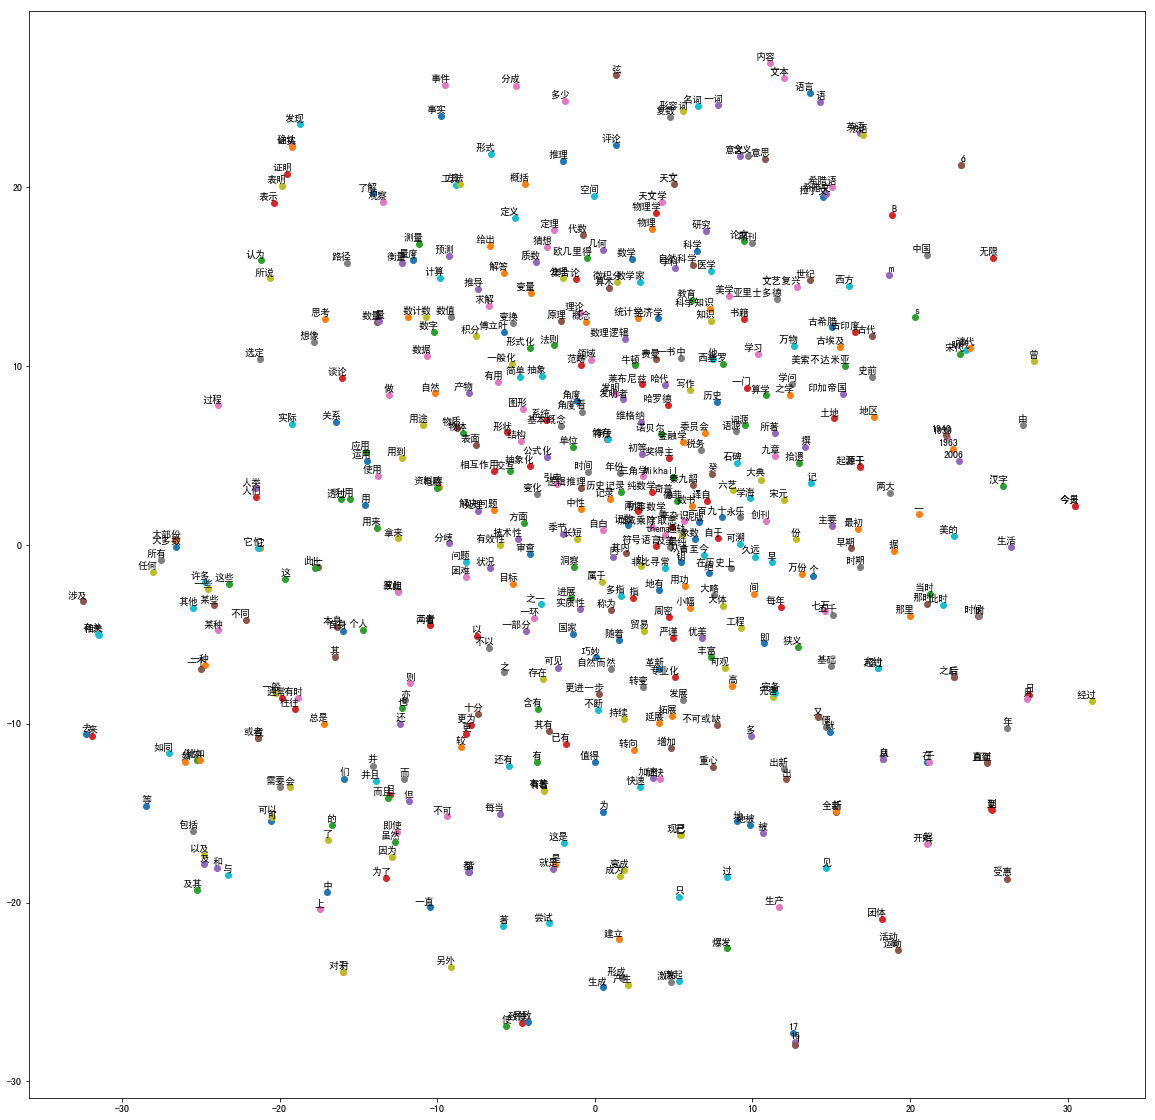

In [89]:
plot_tsne(model)

**重新加载模型**

In [2]:
model = word2vec.Word2Vec.load('model_191115_1')

In [3]:
model.wv.most_similar(positive=['女人', '国王'])

[('男人', 0.7393646836280823),
 ('王后', 0.691662073135376),
 ('女王', 0.6306385397911072),
 ('寡妇', 0.6218459606170654),
 ('法老', 0.6215347051620483),
 ('君王', 0.6148799657821655),
 ('仆人', 0.6132031083106995),
 ('君主', 0.611193835735321),
 ('暴君', 0.6031671762466431),
 ('女巫', 0.587738037109375)]